In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

In [3]:
#nltk.download('vader_lexicon')

In [4]:
df = pd.read_csv('input/tweets_of_f234_users_1663839312.csv')

In [5]:
df

,userid,account_type,clean_tweet
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https..."
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht..."
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t..."
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:..."
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t..."
...,...,...,...
488632,3077047801,bot,A Tribute – Joan Rivers on Fitness http://t.co...
488633,3077047801,bot,Live in Orlando area? Want a personal trainer?...
488634,3077047801,bot,If you're trying to get fit keep working. You...
488635,3077047801,bot,Ready for summer? Cheap cool sunglasses - loo...


In [6]:
userid_accountype = df[['userid', 'account_type']].drop_duplicates()

In [7]:
userid_accountype['account_type'].value_counts()

human    146
bot       71
Name: account_type, dtype: int64

In [10]:
%%time
# Wall time: 2min 13s
pred = []
vader_label = []
sid = SentimentIntensityAnalyzer()
for sentence in df['clean_tweet'].values:
       
    ss = sid.polarity_scores(sentence)
    
    pred.append(ss['compound'])
    
    if(ss['compound'] < 0.05 and ss['compound'] > -0.05):
        vader_label.append('neutral')
    elif(ss['compound'] >= 0.05):
        vader_label.append('positive')
    elif(ss['compound'] <= -0.05):
        vader_label.append('negative')

CPU times: user 2min 17s, sys: 1.43 s, total: 2min 18s
Wall time: 2min 18s


In [11]:
df['vader_sentiment'] = pred
df['vader_label'] = vader_label

In [12]:
df

,userid,account_type,clean_tweet,vader_sentiment,vader_label
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https...",0.0000,neutral
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht...",0.0000,neutral
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t...",0.0000,neutral
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:...",0.0000,neutral
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t...",0.0000,neutral
...,...,...,...,...,...
488632,3077047801,bot,A Tribute – Joan Rivers on Fitness http://t.co...,0.2732,positive
488633,3077047801,bot,Live in Orlando area? Want a personal trainer?...,0.1680,positive
488634,3077047801,bot,If you're trying to get fit keep working. You...,0.8608,positive
488635,3077047801,bot,Ready for summer? Cheap cool sunglasses - loo...,0.7430,positive


In [13]:
df_mean_sentiment = df.groupby(['userid', 'vader_label']).mean().reset_index()

In [14]:
df_mean_sentiment.rename({'vader_sentiment': 'mean_sentiment'}, axis='columns', inplace = True)

In [15]:
df_mean_sentiment

,userid,vader_label,mean_sentiment
0,418,negative,-0.431048
1,418,neutral,0.000060
2,418,positive,0.565365
3,586,negative,-0.461686
4,586,neutral,0.000057
...,...,...,...
635,1014793793353199617,neutral,0.000009
636,1014793793353199617,positive,0.509822
637,1034115201979826178,negative,-0.344304
638,1034115201979826178,neutral,-0.000113


In [16]:
df_var_sentiment = df.groupby(['userid']).var().reset_index()

In [17]:
df_var_sentiment.rename({'vader_sentiment': 'variance_sentiment'}, axis='columns', inplace = True)

In [18]:
df_var_sentiment

,userid,variance_sentiment
0,418,0.175295
1,586,0.206516
2,2622731,0.151959
3,5768282,0.002442
4,14157134,0.200867
...,...,...
212,969324483185119232,0.165845
213,982628478284595200,0.204360
214,1006905571994472448,0.174320
215,1014793793353199617,0.161225


In [19]:
df_mean_var = df_mean_sentiment.merge(df_var_sentiment, on=['userid'], how = 'inner')

In [20]:
df_mean_var

,userid,vader_label,mean_sentiment,variance_sentiment
0,418,negative,-0.431048,0.175295
1,418,neutral,0.000060,0.175295
2,418,positive,0.565365,0.175295
3,586,negative,-0.461686,0.206516
4,586,neutral,0.000057,0.206516
...,...,...,...,...
635,1014793793353199617,neutral,0.000009,0.161225
636,1014793793353199617,positive,0.509822,0.161225
637,1034115201979826178,negative,-0.344304,0.156157
638,1034115201979826178,neutral,-0.000113,0.156157


In [21]:
df_mean_var_w_acctype = df_mean_var.merge(userid_accountype, on=['userid'], how = 'inner')

In [22]:
df_mean_var_w_acctype['account_type'].value_counts()

human    435
bot      205
Name: account_type, dtype: int64

<AxesSubplot:xlabel='mean_sentiment', ylabel='variance_sentiment'>

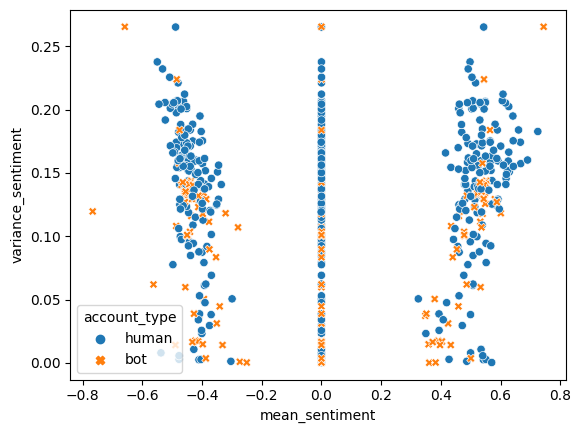

In [24]:
sns.scatterplot(data = df_mean_var_w_acctype, x = "mean_sentiment", y = "variance_sentiment", hue = "account_type", style = "account_type")

<AxesSubplot:xlabel='mean_sentiment', ylabel='variance_sentiment'>

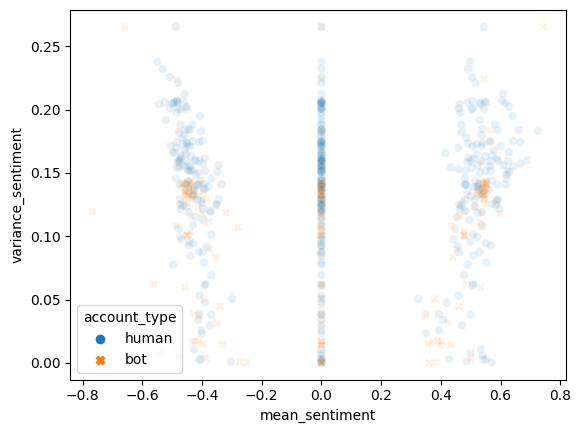

In [27]:
sns.scatterplot(data = df_mean_var_w_acctype, x = "mean_sentiment", y = "variance_sentiment", hue = "account_type", style = "account_type", alpha=0.1)